# Profitable App Profiles for the App Store and Google Play Markets

## Introduction
* A company builds Android and iOS mobile apps that are available on Google Play and in the App Store. All apps built are **free** to download and install for English-speaking audience. The main source of revenue of A company consists of **in-app ads**. This means the more users who see and engage with the ads, the better.

* The aim of the project is to analyse data to help the developers understand what type of apps are likely to attract more users.

## Data source and description
* Two datasets are used in this project. One from GooglePlay whilst the other from AppleStore. 
* Link to download the GooglePlay data here: [Link](https://www.kaggle.com/datasets/lava18/google-play-store-apps). You can also find data documentation to help you understand waht each column describes 
* Link to download the AppleStore data here:[Link](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps). You can also find data documentation to help you understand waht each column describes

## Data details 
**googleplaystore.csv**

|Column|Description|
|------|-----------|
|App|Application name|
|Category|Category the app belongs to|
|Rating|Overall user rating of the app (as when scraped)|
|Reviews|Number of user reviews for the app (as when scraped)|
|Size|Size of the app (as when scraped)|
|Installs|Number of user downloads/installs for the app (as when scraped)|
|Type|Paid or Free|
|Price|Price of the app (as when scraped)|
|Content Rating|Age group the app is targeted at - Children / Mature 21+ / Adult|
|Genres|An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Famil|
|Last Updated|Date when the app was last updated on Play Store (as when scraped)|
|Current Ver|Current version of the app available on Play Store (as when scraped)|
|Android Ver|Min required Android version (as when scraped)|

**Mobile App Store**

|Column|Description|
|------|-----------|
|id|App ID|
|track_name|App Name|
|size_bytes|Size (in Bytes)|
|currency|Currency Type|
|price|Price amount|
|rating_count_tot|User Rating counts (for all version)|
|rating_count_ver|User Rating counts (for current version)|
|user_rating|Average User Rating value (for all version)|
|user_rating_ver|Average User Rating value (for current version)|
|ver|Latest version code|
|cont_rating|Content Rating|
|prime_genre|Primary Genre|
|sup_devices.num|Number of supporting devices|
|ipadSc_urls.num|Number of screenshots showed for display|
|lang.num|Number of supported languages|
|vpp_lic|Vpp Device Based Licensing Enabled|

In [1]:
#open the two datasets and save both as lists of lists

open_file_apple = open('AppleStore.csv')
from csv import reader
apple_read = reader(open_file_apple)
apple_file = list(apple_read)
apple_dataset = apple_file[1:]
open_file_google = open('googleplaystore.csv')
google_read = reader(open_file_google)
google_file = list(google_read)
google_dataset = google_file[1:]

## Explore the two datasets by printing the first few rows and confirm the number of rows and columns excluding the header row

In [2]:
#explort both datasets by printing the data out using explore_data() function
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n')
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [3]:
explore_data(apple_dataset, 0, 5, rows_and_columns=True)
explore_data(google_dataset, 0, 5, rows_and_columns=True)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


['284035177', 'Pandora - Music & Radio', '130242560', 'USD', '0.0', '1126879', '3594', '4.0', '4.5', '8.4.1', '12+', 'Music', '37', '4', '1', '1']


Number of rows: 7197
Number of columns: 16
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '

In [4]:
#print the column names of each dataset
print(apple_file[0])
print(google_file[0])

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


# Data cleaning
## Part 1 - Detecting errors

1. By reading the 'discussion' in the source data in the link, we understand there is an error in the Googleplay dataset which we need to remove before analysing.

2. The inspection shows that this error was contributed to having a missing value in 'category'.

3. We removed this row by using the `del` command.

In [5]:
#detected an error for one row of Googleplay dataset
print(google_dataset[10472])
len(google_dataset[10472])
# missing one column 'catogery' and hence column shift has happened in this row.

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


12

In [6]:
#removed the error row detected
del google_dataset[10472]

## Part 2 - Detecting number of duplicated entries in the Googleplay dataset

In [7]:
# detected duplicated rows in Googleplay dataset as shown below
duplicates= []
unique = []

for row in google_dataset:
    if row[0] in unique: #using the app name, row[0]
        duplicates.append(row[0])
    else:
        unique.append(row[0])
print(f'Number of duplicate apps: {len(duplicates)}')
print('\n')
print(f"Examples of duplicate apps' name: {duplicates[:5]}")

Number of duplicate apps: 1181


Examples of duplicate apps' name: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings']


## Part 3 - Identifying the reason for the duplicates

1. By inspecting the duplicated entries, we understand the biggest reason for the duplicates was due to the 'number of reviews' being recorded at different days.
2. We will save only the row with the 'highest reviews' as we trust row as such would be most updated.

In [8]:
# now a significant number of duplicated apps is detected, we will remove the duplicates using a criteria
# first see why so many duplicates for the same app in the first place by printing the duplicated app rows out

for row in google_dataset:
    if row[0] == 'Quick PDF Scanner + OCR FREE':
        print(row)
        
# We can tell from the result that the reasons for duplicates is because different number of reviews were recorded. 
# The different numbers show the data was collected at different times.

['Quick PDF Scanner + OCR FREE', 'BUSINESS', '4.2', '80805', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'February 26, 2018', 'Varies with device', '4.0.3 and up']
['Quick PDF Scanner + OCR FREE', 'BUSINESS', '4.2', '80805', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'February 26, 2018', 'Varies with device', '4.0.3 and up']
['Quick PDF Scanner + OCR FREE', 'BUSINESS', '4.2', '80804', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'February 26, 2018', 'Varies with device', '4.0.3 and up']


In [9]:
# We will only be saving the app with the higherst number of reviews and removed the rest of its duplicates.
# Expected number of rows to work on for Googleplay dataset 

print(f'Expected length for Googleplay dataset: {len(google_dataset) - 1181}') # the number of duplicates found in Googleplay dataset in the previous step

Expected length for Googleplay dataset: 9659


## Part 4 - Removing duplicated entries in Googleplay dataset

* We will be keeping the app with the **highest number of reviews** only and remove the rest. 
* To do so, we first create a dictionary `reviews_max` that stores the name of the app and its highest reviews identified. 

In [10]:
# Removing the duplicates in the Googleplay dataset using the criteria stated above

reviews_max = {}
for row in google_dataset:
    name = row[0]
    n_reviews = float(row[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    if name not in reviews_max: # ensurd 'else' clause if not used, otherwise the wrong no. of reviews will be updated should 'reviews_max[name] < n_reviews' evalues to False
        reviews_max[name] = n_reviews

print(len(reviews_max)) # inspecting if the number of rows matched the above    


9659


## Part 5 - Get cleaned data using two conditions 

* store the row when the number of review matches with that stored in `reviews_max`.
* We also need to ensure the same app has not been saved before. This is important in case an app has the same highest number of reviews 'twice' or more. 

In [11]:
android_clean = [] # storing new cleaned data set
already_added = [] # only store app names 

for row in google_dataset:
    name = row[0]
    n_reviews = float(row[3])
    if n_reviews == reviews_max[name] and name not in already_added:
        android_clean.append(row)
        already_added.append(name)

# explore if android_clean dataset went as expected 

print(len(android_clean)) # expected number of rows to be 9659

9659


## Part 6 - Confirming any duplicates in AppStore dataset

* We will be using the `id` column to confirm whether there is any duplicates in this dataset.
* The result showed that there is no duplicates in the AppStore dataset.
* The source where we got the data did not suggest any errors in the dataset, and we will go along with that conclusion.

In [12]:
unique_id = []
duplicate_id = []

for row in apple_dataset:
    if float(row[0]) in unique_id:
        duplicate_id.append(float(row[0]))
    else:
        unique_id.append(float(row[0]))

print(len(duplicate_id)) # to confirm if there is any duplicate entries or not in the AppStore dataset
        

0


## Part 7 - Removing Non-English Apps: Part 1 

1. We use **English** for the apps we develop at A company, so we'd like to analyse only the apps that are designed for an **English-speaking audience**. 2. We realised that both datasets have apps with names that suggest they are not designed for an English-speaking audience.
3. We will aim to remove those before analysis.
4. To remove them, we need to first identify them by checking if the characters used in the app name fall within the range of **0 to 127**, a range in which the characters in an English text is commonly used according to the [ASCII](https://en.wikipedia.org/wiki/ASCII) (American Standard Code for Information Interchange) systemusing the built-in `ord()` function. 
5. Based upon the above, we will build a function that detects whether a character belongs to this range or not.
 * If the number is equal to or less than 127, then the character belongs to the set of common English characters; 
 * If an app name contains a character that is greater than 127, then it probably means that the app has a non-English name. 

In [13]:
# First, we write a function that takes in a string and returns False if there's any character in the string that doesn't belong to the set of common English characters; otherwise, the function returns True.

def englishapp_test(string):   
    for character in string:
        if ord(character) > 127: # using built-in function ord() to find the corresponding number of the character
            return False
    return True
    
# Check if the function works properly on the following app names:

print(englishapp_test('Instagram')) # expected True 
print(englishapp_test('爱奇艺PPS -《欢乐颂2》电视剧热播')) # expected False
print(englishapp_test('Docs To Go™ Free Office Suite')) # expected False because of ™
print(englishapp_test('Instachat 😜')) # expected False because of 😜

True
False
False
False


In the previous step we realised `englishapp_test(string)` couldn't successfully identify English app. To improve it, we will include a filter that only returns False if up to **3** characters fall outside the range (meaning we effectively allow special characters like emojis for up to 3 times). This is not perfect, but it should be effective enough.

In [14]:
# Improve the function so that it only returns False to allow special characters like emojis up to 3 times.
def englishapp_improved(string):   
    count = 0 # initiate a counter to count the times up to 3 
    for character in string:
        if ord(character) > 127: 
            count += 1
    if count > 3:
        return False
    return True

# test if the improved function works properly 

print(englishapp_improved('Docs To Go™ Free Office Suite')) # expect True
print(englishapp_improved('Instachat 😜')) # expect True 
print(englishapp_improved('爱奇艺PPS -《欢乐颂2》电视剧热播')) # expect False

True
True
False


* Now we are going to the improved function `englishapp_improved(string)` to filter out non-English apps from both datasets. 
* We will loop through each dataset (`android_clean` (the one where we removed the duplicates) and `apple_dataset`) If an app name is identified as English, append the whole row to a separate list.

In [15]:
# Append the English apps from Googleplay to Apps_Eng

Google_eng = []
for row in android_clean:
    name = row[0]
    if englishapp_improved(name):
        Google_eng.append(row)

# Append the English apps from Appstore to Apps_Eng
Apple_eng = []
for row in apple_dataset:
    name = row[1]
    if englishapp_improved(name):
        Apple_eng.append(row)

# check how many rows we end up having 
print(f'The number of English apps remaining from Googleplay: {len(Google_eng)}')
print(f'The number of English apps remaining from Appestore: {len(Apple_eng)}')

The number of English apps remaining from Googleplay: 9614
The number of English apps remaining from Appestore: 6183


## Part 8 - Isolating the Free Apps

So far in the data cleaning process, we've done the following:

* Removed inaccurate data
* Removed duplicate app entries
* Removed non-English apps

As we mentioned earlier, A company only builds apps that are **free** to download and install, and the main source of revenue consists of in-app ads. As the datasets contain both free and non-free apps, we should isolate only the **free** apps for our analysis.

Once the above is done, the datasets should be ready for analysis.

In [16]:
# First, inspect the data type of the price of each dataset
# There is actually a column called 'Type' in the Googleplay set indicating whether an app is 'Free' or 'Paid'
# For consistency, we will use both the 'price' column to identify free apps

print(Google_eng[0][7])
print(type(Google_eng[0][7]))

print(Apple_eng[0][4])
print(type(Apple_eng[0][4]))

0
<class 'str'>
0.0
<class 'str'>


In [17]:
# The above confirmed the value in the price columns for both datasets is a string

Google_free = []
for row in Google_eng:
    if row[7] == '0':
        Google_free.append(row)
        
Apple_free = []
for row in Apple_eng:
    if row[4] == '0.0':
        Apple_free.append(row)

# Check the remaining rows left in each dataset
print(f'The number of English apps remaining from Googleplay: {len(Google_free)}')
print(f'The number of English apps remaining from Appestore: {len(Apple_free)}')

The number of English apps remaining from Googleplay: 8864
The number of English apps remaining from Appestore: 3222


# Data Analysis 

So far, we have: 

* Removing inaccurate data
* Removing duplicate app entries
* Removing non-English apps
* Isolating the free apps

Our goal is to determine the kinds of apps that are **likely to attract more users** because the number of people using our apps directly affect A company's revenue.

To minimise risks and overhead, our **validation strategy for an app idea** has the following three steps:

1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

As the end goal is to add the app on **both Google Play and the App Store**, we need to find **app profiles that are successful in both markets** (for instance, a profile that works well for both markets might be a productivity app that makes use of gamification).

## Part 1 
We will begin by determining the **most common genres** for each dataset before using a **frequency tables** we build for a few columns in the datasets.

We first need to identify the columns to use to generate such frequency tables to determine the most common genres in each market.

In [18]:
# print out the header row in each dataset to inspect which column might be useful to decide the genre 
print('Appstore columns:')
print(apple_file[0])
print('\n')
print('Googleplay columns:')
print(google_file[0])
print('\n')
print('Googleplay example row:')
print(Google_free[0])
print('\n')
print('Appstore example row:')
print(Apple_free[0])

Appstore columns:
['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


Googleplay columns:
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


Googleplay example row:
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


Appstore example row:
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


The result above shows that `prime_genre` from  Appstore and `Genres` plus `Category` from Googleplay might be useful. 

For this, We'll build two functions we can use to analyse the frequency tables:
* One function to generate frequency tables that show percentages called `freq_table()`.
* Another function we can use to display the percentages in a **descending** order using the built-in `sorted()` function.

In [19]:
# The function should return the frequency table (as a dictionary) for any column we want. The frequencies should also be expressed as percentages.

def freq_table(dataset, index):
    
    freq = {}
    for row in dataset:
        content = row[index]
        if content in freq:
            freq[content] += 1
        else:
            freq[content] = 1
             
    for key in freq:
        freq[key] = (freq[key] / len(dataset)) * 100
        
    return freq

# Check if freq_table works properly
freq_table(Apple_free, 11)

{'Social Networking': 3.2898820608317814,
 'Photo & Video': 4.9658597144630665,
 'Games': 58.16263190564867,
 'Music': 2.0484171322160147,
 'Reference': 0.5586592178770949,
 'Health & Fitness': 2.0173805090006205,
 'Weather': 0.8690254500310366,
 'Utilities': 2.5139664804469275,
 'Travel': 1.2414649286157666,
 'Shopping': 2.60707635009311,
 'News': 1.3345747982619491,
 'Navigation': 0.186219739292365,
 'Lifestyle': 1.5828677839851024,
 'Entertainment': 7.883302296710118,
 'Food & Drink': 0.8069522036002483,
 'Sports': 2.1415270018621975,
 'Book': 0.4345127250155183,
 'Finance': 1.1173184357541899,
 'Education': 3.662321539416512,
 'Productivity': 1.7380509000620732,
 'Business': 0.5276225946617008,
 'Catalogs': 0.12414649286157665,
 'Medical': 0.186219739292365}

As seen above, `freq_table()` works properly as expected. But before we can use the `sorted()` function to show the frequency in **descending** order, we need to transform the `freq_table` dictionary into a list of tuples, where each tuple contains a dictionary key along with its corresponding dictionary value because `sorted()` function doesn't work too well with dictionaries as it only considers and returns the dictionary keys.

To ensure the sorting works right, we should also ensure the dictionary value comes first, and the dictionary key comes second.

Here, we use a rather complicated way by coming up with a helper function called `display_table()` which will sort a dictionary. We are aware other simpler ways to do this. As of now, we are stick to this method nonetheless. 

In [20]:
def display_table(dataset, index):
    table = freq_table(dataset, index) # the freq_table generated above to generate a frequency table
    table_display = []
    
    for key in table:
        table_tuple = (table[key], key) # transforming the frequency table dictionary as tuple
        table_display.append(table_tuple)
        
    table_sorted = sorted(table_display, reverse=True)
    
    for a in table_sorted:
        print(f'{a[1]}: {a[0]}')

## Analyisng `prime_genre` column of the App Store dataset

We have generated frequency tables for the columns `prime_genre`, `Genres`, and `Category`. We'll now focus on analysing these frequency tables.

1. We will aim to answer the following questions:
* For the `prime_genre` column of the App Store dataset:
  1. What is the most common genre? What is the next most common? 
  2. What other patterns do you see?
  3. What is the general impression (ie., are most of the apps designed for practical purposes (education, shopping, utilities, productivity, lifestyle) or more for entertainment (games, photo and video, social networking, sports, music)?
  4. Can we really recommend an app profile for the App Store market based on this frequency table alone? If there's a large number of apps for a particular genre, does that also imply that apps of that genre generally have a large number of users?

In [21]:
display_table(Apple_free, 11)

Games: 58.16263190564867
Entertainment: 7.883302296710118
Photo & Video: 4.9658597144630665
Education: 3.662321539416512
Social Networking: 3.2898820608317814
Shopping: 2.60707635009311
Utilities: 2.5139664804469275
Sports: 2.1415270018621975
Music: 2.0484171322160147
Health & Fitness: 2.0173805090006205
Productivity: 1.7380509000620732
Lifestyle: 1.5828677839851024
News: 1.3345747982619491
Travel: 1.2414649286157666
Finance: 1.1173184357541899
Weather: 0.8690254500310366
Food & Drink: 0.8069522036002483
Reference: 0.5586592178770949
Business: 0.5276225946617008
Book: 0.4345127250155183
Navigation: 0.186219739292365
Medical: 0.186219739292365
Catalogs: 0.12414649286157665


We can see from the result above that the most common genres for **free apps** designed for **English-speaking audience** from **Appstore** is `Games` followed by `Entertainment`.

We can tell from the result above, at least for free apps designed for English-speaking audience from Appstore, most of the apps are **for entertainment** purpose. However, even when the fun apps are the most dominant here, it does not necessarily mean they have the greatest number of users. The idea is **the demand might not be the same as the offer** so the conclusion is it is not ideal for us to recommend an app profile for the App Store market based solely on this frequency table. We need additional information.

## Analyisng `Category` and `Genres`columns of Googleplay 

We will generate the frequency tables using the same function above. 

We will answer the following:
* What are the most common genres?
* What other patterns do you see?
* Compare the patterns you see for the Google Play market with those you saw for the App Store market.
* Can you recommend an app profile based on what you found so far? Do the frequency tables you generated reveal the most frequent app genres or what genres have the most users?

In [22]:
display_table(Google_free, 1) #frequency table based upon 'Category'

FAMILY: 18.907942238267147
GAME: 9.724729241877256
TOOLS: 8.461191335740072
BUSINESS: 4.591606498194946
LIFESTYLE: 3.9034296028880866
PRODUCTIVITY: 3.892148014440433
FINANCE: 3.7003610108303246
MEDICAL: 3.531137184115524
SPORTS: 3.395758122743682
PERSONALIZATION: 3.3167870036101084
COMMUNICATION: 3.2378158844765346
HEALTH_AND_FITNESS: 3.0798736462093865
PHOTOGRAPHY: 2.944494584837545
NEWS_AND_MAGAZINES: 2.7978339350180503
SOCIAL: 2.6624548736462095
TRAVEL_AND_LOCAL: 2.33528880866426
SHOPPING: 2.2450361010830324
BOOKS_AND_REFERENCE: 2.1435018050541514
DATING: 1.861462093862816
VIDEO_PLAYERS: 1.7937725631768955
MAPS_AND_NAVIGATION: 1.3989169675090252
FOOD_AND_DRINK: 1.2409747292418771
EDUCATION: 1.1620036101083033
ENTERTAINMENT: 0.9589350180505415
LIBRARIES_AND_DEMO: 0.9363718411552346
AUTO_AND_VEHICLES: 0.9250902527075812
HOUSE_AND_HOME: 0.8235559566787004
WEATHER: 0.8009927797833934
EVENTS: 0.7107400722021661
PARENTING: 0.6543321299638989
ART_AND_DESIGN: 0.6430505415162455
COMICS: 0.62

In [23]:
display_table(Google_free, -4) #frequency table based upon 'Genres'

Tools: 8.449909747292418
Entertainment: 6.069494584837545
Education: 5.347472924187725
Business: 4.591606498194946
Productivity: 3.892148014440433
Lifestyle: 3.892148014440433
Finance: 3.7003610108303246
Medical: 3.531137184115524
Sports: 3.463447653429603
Personalization: 3.3167870036101084
Communication: 3.2378158844765346
Action: 3.1024368231046933
Health & Fitness: 3.0798736462093865
Photography: 2.944494584837545
News & Magazines: 2.7978339350180503
Social: 2.6624548736462095
Travel & Local: 2.3240072202166067
Shopping: 2.2450361010830324
Books & Reference: 2.1435018050541514
Simulation: 2.0419675090252705
Dating: 1.861462093862816
Arcade: 1.8501805054151623
Video Players & Editors: 1.7712093862815883
Casual: 1.7599277978339352
Maps & Navigation: 1.3989169675090252
Food & Drink: 1.2409747292418771
Puzzle: 1.128158844765343
Racing: 0.9927797833935018
Role Playing: 0.9363718411552346
Libraries & Demo: 0.9363718411552346
Auto & Vehicles: 0.9250902527075812
Strategy: 0.913808664259927

We can tell from the above that the most common genres of free apps for English-speaking audience at Googleplay in constrast to Appstore focus more on practical use like `Tools` and `Family` (however, we do see `GAME` came second as well based upon `Category` column). Based upon the columns disclosing genres so far, we can see **Appstore tends to focus more on **entertainment whilst Googleplay shows a more balanced landscape of both practical and fun apps.**

It is not very clear the difference between `Category` and `Genres`. However, we can tell that `Genres` is much more granular. As we are only focusing on the bigger picture, we will be focusing on `Catogery` instead. 

Similar to the analysis above for Appstore, it may not be appropriate to recommend an app profile solely based upon the frequency table of these columns. **They show perhaps the most frequent app genres, but they do not show what genres have the most users.** To answer that, we need extra information. 

## Most Popular Apps by Genre on the App Store - Method

The frequency tables we analysed on the previous screen showed us that **apps designed for fun dominate the App Store, while Google Play shows a more balanced landscape of both practical and fun apps.** Now, we will determine the type of apps with the most users.

One way to find out what genres are the most popular (have the most users) is to calculate the **average number of installs for each app genre.** For the Google Play data set, we can find this information in the `Installs` column, but this information is missing for the App Store data set. As an alternative, we will take the **total number of user ratings** as a proxy, which we can find in the `rating_count_tot` column.

We will start with calculating the **average number of user ratings per app genre** on the App Store. To do that, we will need the following:

* Isolate the apps of each genre
* Add up the user ratings count for the apps of that genre
* Divide the sum by the number of apps belonging to that genre (not by the total number of apps)

We will use a **nested loop** to achieve the above. 

In [24]:
# Generating a frequency table for the prime_genre column to get the unique app genres using freq_table function above.

unique_genre_apple = freq_table(Apple_free, 11) # fre_table returns a dictionary 

# Loop over the unique genres of the App Store dataset. 

for genre in unique_genre_apple:
    total = 0 # will store the sum of user ratings counts 
    len_genre = 0 # stores the number of apps specific to each genre
    for app in Apple_free: #the nested loop will finish its loop before continuing the remaining iteration of the mother loop above
        genre_app = app[11]
        if genre_app == genre:
            total += float(app[5]) # app[5] shows the total number of ratings received per genre (counts not actual rating value)
            len_genre += 1 # len_genre stores the number of apps specific to each genre
    ave_count_per_genre = total / len_genre # from here, it has to be outside the inner loop to show the result of 'total' apps rather than each app
    print(genre)
    print(ave_count_per_genre)
    

Social Networking
71548.34905660378
Photo & Video
28441.54375
Games
22788.6696905016
Music
57326.530303030304
Reference
74942.11111111111
Health & Fitness
23298.015384615384
Weather
52279.892857142855
Utilities
18684.456790123455
Travel
28243.8
Shopping
26919.690476190477
News
21248.023255813954
Navigation
86090.33333333333
Lifestyle
16485.764705882353
Entertainment
14029.830708661417
Food & Drink
33333.92307692308
Sports
23008.898550724636
Book
39758.5
Finance
31467.944444444445
Education
7003.983050847458
Productivity
21028.410714285714
Business
7491.117647058823
Catalogs
4004.0
Medical
612.0


We note from the result that `Navigation`, `Social Networking`, `Reference` seemd to top the result. We will take a closer look on these specific genres.

In [27]:
for app in Apple_free:
    if app[-5] == 'Navigation':
        print(f'{app[1]}: {app[5]}')

Waze - GPS Navigation, Maps & Real-time Traffic: 345046
Google Maps - Navigation & Transit: 154911
Geocaching®: 12811
CoPilot GPS – Car Navigation & Offline Maps: 3582
ImmobilienScout24: Real Estate Search in Germany: 187
Railway Route Search: 5


We can see from the result, there are a few **outliers** in the `Navigation` genre that made this genre specifically higher in the number of reviews received (we see 345046 for *Waze - GPS Navigation, Maps & Real-time Traffic* and 154911 for *Google Maps*). Outside these two, we can see that only *Geocaching®* received reviews more than 10,000 and the rest received less than 5000 in total. **This implies `Navigation` genre may not be as popular as it actually is.** It is the two outliers that skewed the result. 

Next we look at `Social Networking`.

In [28]:
for app in Apple_free:
    if app[-5] == 'Social Networking':
        print(f'{app[1]}: {app[5]}')

Facebook: 2974676
Pinterest: 1061624
Skype for iPhone: 373519
Messenger: 351466
Tumblr: 334293
WhatsApp Messenger: 287589
Kik: 260965
ooVoo – Free Video Call, Text and Voice: 177501
TextNow - Unlimited Text + Calls: 164963
Viber Messenger – Text & Call: 164249
Followers - Social Analytics For Instagram: 112778
MeetMe - Chat and Meet New People: 97072
We Heart It - Fashion, wallpapers, quotes, tattoos: 90414
InsTrack for Instagram - Analytics Plus More: 85535
Tango - Free Video Call, Voice and Chat: 75412
LinkedIn: 71856
Match™ - #1 Dating App.: 60659
Skype for iPad: 60163
POF - Best Dating App for Conversations: 52642
Timehop: 49510
Find My Family, Friends & iPhone - Life360 Locator: 43877
Whisper - Share, Express, Meet: 39819
Hangouts: 36404
LINE PLAY - Your Avatar World: 34677
WeChat: 34584
Badoo - Meet New People, Chat, Socialize.: 34428
Followers + for Instagram - Follower Analytics: 28633
GroupMe: 28260
Marco Polo Video Walkie Talkie: 27662
Miitomo: 23965
SimSimi: 23530
Grindr - G

The result is very similar to the that of `Navigation`. We see a few outliers skewed the result, implying `Social Networking` may not be as popular as it actually is. 

Lastly, we will look at `Reference`.

In [29]:
for app in Apple_free:
    if app[-5] == 'Reference':
        print(f'{app[1]}: {app[5]}')

Bible: 985920
Dictionary.com Dictionary & Thesaurus: 200047
Dictionary.com Dictionary & Thesaurus for iPad: 54175
Google Translate: 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran: 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition: 17588
Merriam-Webster Dictionary: 16849
Night Sky: 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE): 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools: 4693
GUNS MODS for Minecraft PC Edition - Mods Tools: 1497
Guides for Pokémon GO - Pokemon GO News and Cheats: 826
WWDC: 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free: 718
VPN Express: 14
Real Bike Traffic Rider Virtual Reality Glasses: 8
教えて!goo: 0
Jishokun-Japanese English Dictionary & Translator: 0


Although we note a few outliers skewing the result, just like the other two genres. **This genre shows more potential if we can take another popular book and turn it into something that add-on features (like an audio version of the book, embedding the book with a dictionary so the readers do not need to exit the app).** This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us:

* Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.

* Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.

* Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

We will now move on to analyse the Googleplay dataset for the most popular genre. 

## Most Popular Apps by Genre on Google Play - Method 

We have come up with app profile recommendations for the App Store based on the number of user ratings. However for Googleplay, we actually have data about the exact number of installs per app which should provide a clearer picture about genre popularity. The only downside is, the install numbers do not seem precise enough, as we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

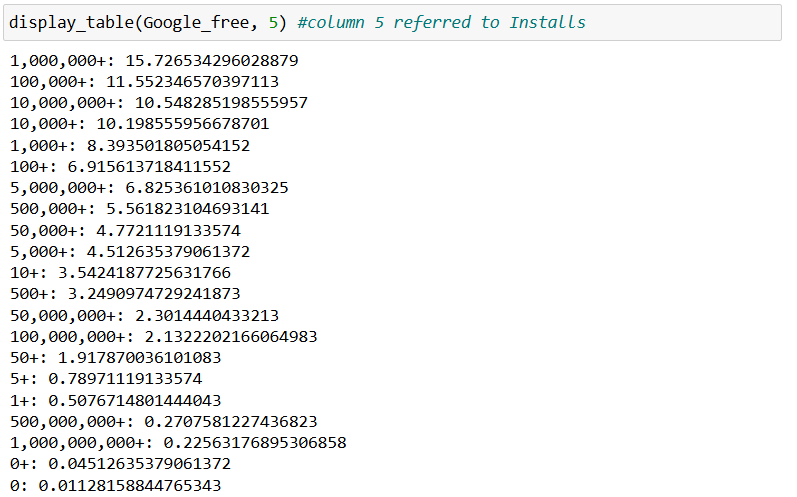

It remains unclear whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, as we do not need very precise data for our purposes (we only want to find out which app genres attract the most users), this should not create a big problem.

As a result, we will be leaving the numbers as they are, which means that we will consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on. 

To perform computations, however, **we will need to convert each install number from a string to a float. This means we need to remove the commas and the plus characters, or the conversion will fail and cause an error.**

To remove characters from strings, we will be using the `str.replace(old, new)` method. We will replace the non-numerical characters with the empty string `''`:

In [25]:
# Start by generating a frequency table for the Category column of the Google Play dataset to get the unique app genres

unique_genre_google = freq_table(Google_free, 1) #We use Category rather than Genre as Category is more generic. 

# Loop over the unique genres of the Google Play dataset. 

for category in unique_genre_google:
    total = 0 # stores the sum of installs specific to each genre
    len_category = 0 # stores the number of apps specific to each genre
    for app in Google_free:
        category_app = app[1] # app[1] stores app genre
        if category_app == category:
            installs = app[5] #app[5] stores the number of installs per app
            installs = installs.replace('+', '') # Remove any + or , character, and then convert the string to a float.
            installs = installs.replace(',', '')
            total += float(installs) # Add up the number of installs to the total variable.
            len_category += 1 # Increment the len_category variable by 1.
    ave_count_per_category = total / len_category # from here, it has to be outside the inner loop to show the result of 'total' apps rather than each app
    print(category)
    print(ave_count_per_category)
    

ART_AND_DESIGN
1986335.0877192982
AUTO_AND_VEHICLES
647317.8170731707
BEAUTY
513151.88679245283
BOOKS_AND_REFERENCE
8767811.894736841
BUSINESS
1712290.1474201474
COMICS
817657.2727272727
COMMUNICATION
38456119.167247385
DATING
854028.8303030303
EDUCATION
1833495.145631068
ENTERTAINMENT
11640705.88235294
EVENTS
253542.22222222222
FINANCE
1387692.475609756
FOOD_AND_DRINK
1924897.7363636363
HEALTH_AND_FITNESS
4188821.9853479853
HOUSE_AND_HOME
1331540.5616438356
LIBRARIES_AND_DEMO
638503.734939759
LIFESTYLE
1437816.2687861272
GAME
15588015.603248259
FAMILY
3695641.8198090694
MEDICAL
120550.61980830671
SOCIAL
23253652.127118643
SHOPPING
7036877.311557789
PHOTOGRAPHY
17840110.40229885
SPORTS
3638640.1428571427
TRAVEL_AND_LOCAL
13984077.710144928
TOOLS
10801391.298666667
PERSONALIZATION
5201482.6122448975
PRODUCTIVITY
16787331.344927534
PARENTING
542603.6206896552
WEATHER
5074486.197183099
VIDEO_PLAYERS
24727872.452830188
NEWS_AND_MAGAZINES
9549178.467741935
MAPS_AND_NAVIGATION
4056941.774193

In [26]:
for app in Google_free:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+' or app[5] == '500,000,000+' 
                                  or app[5] == '100,000,000+'):
        print(f'{app[0]}: {app[5]}') 

WhatsApp Messenger: 1,000,000,000+
imo beta free calls and text: 100,000,000+
Android Messages: 100,000,000+
Google Duo - High Quality Video Calls: 500,000,000+
Messenger – Text and Video Chat for Free: 1,000,000,000+
imo free video calls and chat: 500,000,000+
Skype - free IM & video calls: 1,000,000,000+
Who: 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji: 100,000,000+
LINE: Free Calls & Messages: 500,000,000+
Google Chrome: Fast & Secure: 1,000,000,000+
Firefox Browser fast & private: 100,000,000+
UC Browser - Fast Download Private & Secure: 500,000,000+
Gmail: 1,000,000,000+
Hangouts: 1,000,000,000+
Messenger Lite: Free Calls & Messages: 100,000,000+
Kik: 100,000,000+
KakaoTalk: Free Calls & Text: 100,000,000+
Opera Mini - fast web browser: 100,000,000+
Opera Browser: Fast and Secure: 100,000,000+
Telegram: 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer: 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure: 100,000,000+
Viber Messenger: 500,000,000+
WeC

Similar to the result we have seen in Appstore, `COMMUNICATION` is heavily skewed by some social media giants, implying it is not as popular as a genre as we think.

We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The **books and reference** genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, **since we found this genre has some potential to work well on the App Store**, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look at some of the apps from this genre and their number of installs and exclude those 'outliers' with significant numbers of installs that may skew the result. 

In [31]:
for app in Google_free:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(f'{app[0]}: {app[5]}') 

Wikipedia: 10,000,000+
Cool Reader: 10,000,000+
Book store: 1,000,000+
FBReader: Favorite Book Reader: 10,000,000+
Free Books - Spirit Fanfiction and Stories: 1,000,000+
AlReader -any text book reader: 5,000,000+
FamilySearch Tree: 1,000,000+
Cloud of Books: 1,000,000+
ReadEra – free ebook reader: 1,000,000+
Ebook Reader: 5,000,000+
Read books online: 5,000,000+
eBoox: book reader fb2 epub zip: 1,000,000+
All Maths Formulas: 1,000,000+
Ancestry: 5,000,000+
HTC Help: 10,000,000+
Moon+ Reader: 10,000,000+
English-Myanmar Dictionary: 1,000,000+
Golden Dictionary (EN-AR): 1,000,000+
All Language Translator Free: 1,000,000+
Aldiko Book Reader: 10,000,000+
Dictionary - WordWeb: 5,000,000+
50000 Free eBooks & Free AudioBooks: 5,000,000+
Al-Quran (Free): 10,000,000+
Al Quran Indonesia: 10,000,000+
Al'Quran Bahasa Indonesia: 10,000,000+
Al Quran Al karim: 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline: 5,000,000+
Koran Read &MP3 30 Juz Offline: 1,000,000+
Hafizi Quran 15 lines per pag

This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it is probably not a good idea to build similar apps since there'll be some significant competition.

We also notice there are quite a few apps built around the **book Quran**, which suggests that building an app around a popular book can be profitable. **It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.**

However, **it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book.** This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

# Conclusions

In this project, we analysed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

**We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book.** This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.